In [17]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

import scipy.stats as stats

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

In [30]:
def rolling_mean(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(240).mean()
    rolstd = timeseries.rolling(240).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

In [31]:
def test_stationarity2(timeseries):
    adf = ADF(timeseries)
    print(adf.summary().as_text())
    print("\n")

    from arch.unitroot import PhillipsPerron
    pp = PhillipsPerron(timeseries)
    print(pp.summary().as_text())
    print("\n")

    from arch.unitroot import KPSS
    kpss = KPSS(timeseries)
    print(kpss.summary().as_text())

In [32]:
df = pd.read_csv('timeserie_train.csv', parse_dates=['data'], index_col='data')

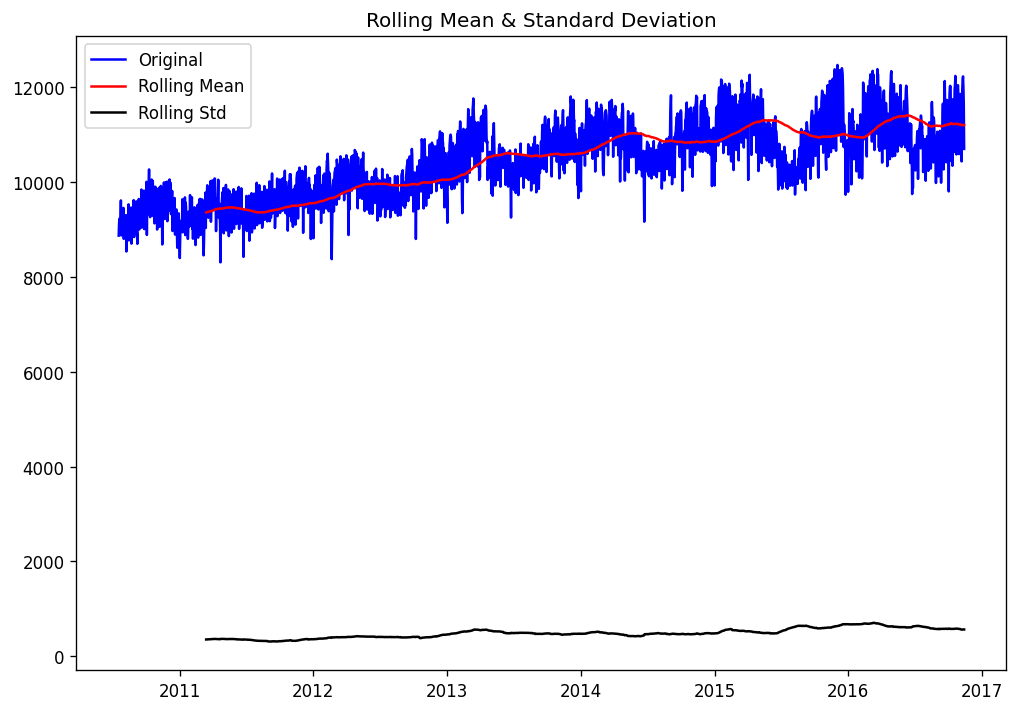

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.992
P-value                         0.290
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -17.187
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


    KPSS Stationarity Test Results   
Test Statistic                  6.421
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [33]:
rolling_mean(df)
test_stationarity2(df)

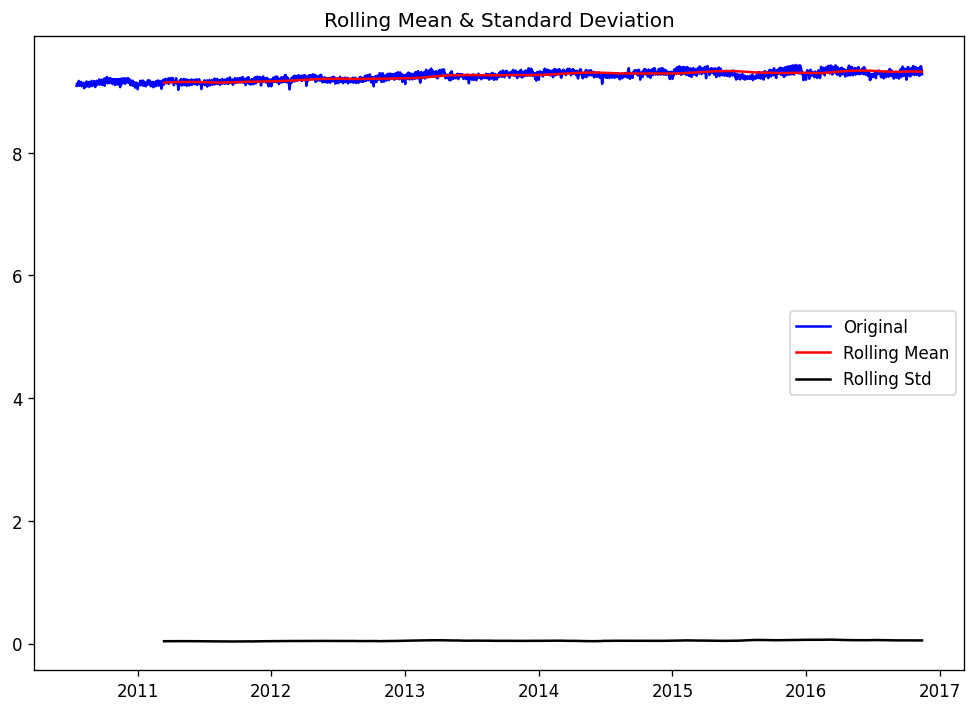

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.004
P-value                         0.285
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -17.361
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


    KPSS Stationarity Test Results   
Test Statistic                  6.450
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [34]:
ts_log = np.log(df)
rolling_mean(ts_log)
test_stationarity2(ts_log)

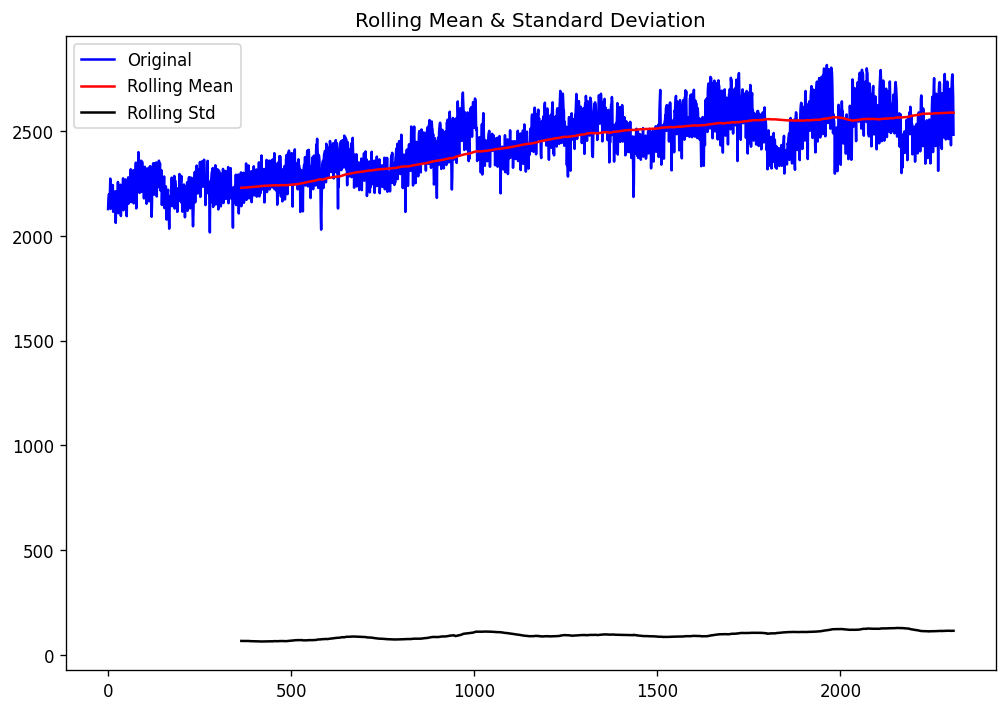

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.993
P-value                         0.290
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -17.210
P-value                         0.000
Lags                               27
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


    KPSS Stationarity Test Results   
Test Statistic                  6.427
P-value                         0.000
Lags                               28
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
N

In [25]:
fitted_data, fitted_lambda = stats.boxcox(df.energia) 
rolling_mean(pd.DataFrame(fitted_data))
test_stationarity2(fitted_data)